# Insights from Failed Orders
---

## Table of Contents
<ul>
<li><a href="#questions">Questions</a></li>
<li><a href="#datadescription">Data Description</a></li>
<li><a href="#EDA">Exploratory Data Analysis</a></li>
<li><a href="#datainsights">Data Insights</a></li>
    <ol>
        <li><a href="#Q1">Question 1</a></li>
        <li><a href="#Q2">Question 2</a></li>
        <li><a href="#Q3">Question 3</a></li>
        <li><a href="#Q4">Question 4</a></li>
    </ol>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

---

<a id="questions"></a>
## Questions

1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

4. Plot the distribution of average ETA by hours. How can this plot be explained?

---

<a id="datadescription"></a>
## Data Description

2 datasets: `data_orders` and `data_offers` being stored in CSV format are provided. 

The dataset `data_orders` contain:
- `order_datetime` - time of the order
- `origin_longtitude` - longtitude of the order
- `origin_latitude` - latitude of the order
- `m_order_eta` - time before order arrival
- `order_gk` - order number
- `order_status_key` - status of the order
    - `4` - cancelled by clinet, 
    - `9` - cancelled by system (a reject)
- `is_driver_assigned_key` - whether a driver has been assigned
- `cancellation_time_in_seconds` - how many seconds passed before cancellation

The dataset `data_offers` contain:
- `order_gk` - order number, associated with the same column from the `orders` dataset
- `origin_id` - ID of an offer

---

<a id="EDA"></a>
## Exploratory Data Analysis

In [1]:
# Impoer libraries
import pandas as pd
import numpy as np

In [ ]:
# Import Orders data
orders = pd.read_csv(filepath_or_buffer="datasets/data_orders.csv")

In [3]:
# Display the first 5 rows of the DataFrame
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [ ]:
# rows + columns
orders.shape

(10716, 8)

In [6]:
# Basic information about the DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [8]:
# Import Offers data
offers = pd.read_csv(filepath_or_buffer="datasets/data_offers.csv")

In [9]:
# Display the first 5 rows of the DataFrame
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [10]:
# rows + columns
offers.shape

(334363, 2)

In [11]:
# Basic information about the DataFrame
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


As both datasets contain `orders` column in common, we will merge them into one DataFrame for data manipulation. 

In [ ]:
# Merge the two DataFrames on the 'order_gk' column
df = orders.merge(right=offers, how='inner', on='order_gk')

In [13]:
# Display the first 5 rows of the merged DataFrame
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [14]:
# Rename the 'order_datetime' column to 'order_time'
df.rename(columns={'order_datetime': 'order_time'},inplace=True)

The current values in two columns `order_status_key` and `is_driver_assigned_key` are not informative enough as they are in the forms of keys that relate to internal description. 

Therefore, the quality of the combined dataframe can be improved by mapping the current values with more meaningful ones such as `1` with `Yes` and `0` with `No`.

In [15]:
# Encode nominal categorical variables using one-hot encoding
df["is_driver_assigned"] = np.where(df["is_driver_assigned_key"] == 1, "Yes", "No")
df["order_status"] = np.where(df["order_status_key"] == 4, "Client Cancelled", "System Reject")

In [16]:
# Drop the original key columns
df.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True)

In [17]:
# Display the first 5 rows of the refined DataFrame
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled


At this point, the combined dataframe is ready for analysing.

<a id="datainsights"></a>
## Data Insights

<a id="Q1"></a>
### **Question 1**

**Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?**

To build a distribution based on two types of reasons for failure, a pivot table is recommended as each column has only 2 possible values. Therefore, 4 possible combinations of values can be generated. 

In [27]:
fail_dist = df.pivot_table(columns=['is_driver_assigned', 'order_status'], values=['order_gk'] , aggfunc='count')
fail_dist

is_driver_assigned               No                            Yes  \
order_status       Client Cancelled System Reject Client Cancelled   
order_gk                      13435          9469             8360   

is_driver_assigned                
order_status       System Reject  
order_gk                       4

In [52]:
gb1 = df.groupby(by=["is_driver_assigned","order_status"])["order_gk"].count()
gb1

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

It is clear that a higher number of cancelled orders happen before a driver is successfully assigned, indicating that highly due to long waiting time, customers decided on transportation alterantives. Specifically, `13435` orders were cancelled by client and `9469` by the system. There are `8360` orders cancelled by client and only `4` by the system after a driver was assigned. 

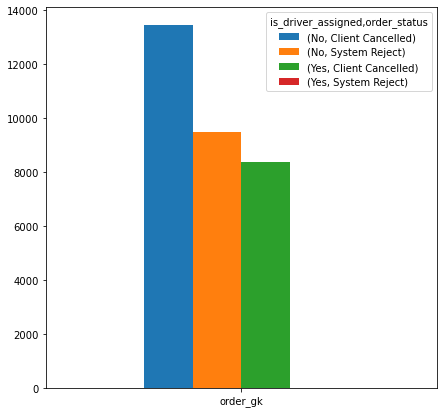

In [44]:
p = fail_dist.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)

<a id="Q2"></a>
### **Question 2**

**Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?**

As the question is focused on analysing the distribution of failed orders by hours, the hour number must be extracted from the `order_time` column firstly.

In [35]:
df['order_time'].describe

<bound method NDFrame.describe of 0        18:08:07
1        20:57:32
2        20:57:32
3        20:57:32
4        12:07:50
           ...   
31263    12:44:11
31264    12:42:52
31265    13:11:35
31266    13:17:21
31267    11:49:35
Name: order_time, Length: 31268, dtype: object>

The current data type is Object and numbers are separated by `:`; therefore, we need to extract the first 2 numbers recognised as the hour.

In [39]:
df["order_hour"] = df["order_time"].str.split(":").apply(lambda split: split[0])

In [43]:
df[["order_time","order_hour"]].head()

,order_time,order_hour
0,18:08:07,18
1,20:57:32,20
2,20:57:32,20
3,20:57:32,20
4,12:07:50,12


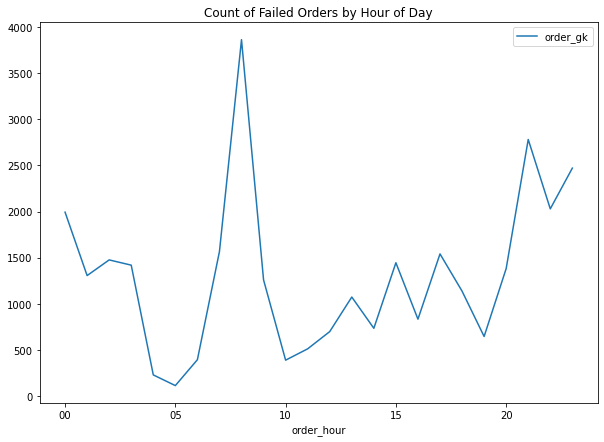

In [48]:
p = df.groupby(by="order_hour")["order_gk"].count().plot(figsize=(10, 7),legend=True,title="Count of Failed Orders by Hour of Day")

Next we check the number of failed orders based on `order_hour` and other 2 categories.

In [59]:
gb2 = df.groupby(by=["order_hour","is_driver_assigned","order_status"])["order_gk"].count()
gb2

order_hour  is_driver_assigned  order_status    
00          No                  Client Cancelled     957
                                System Reject        706
            Yes                 Client Cancelled     326
                                System Reject          4
01          No                  Client Cancelled     633
                                                    ... 
22          No                  System Reject        660
            Yes                 Client Cancelled     415
23          No                  Client Cancelled    1144
                                System Reject        883
            Yes                 Client Cancelled     444
Name: order_gk, Length: 73, dtype: int64

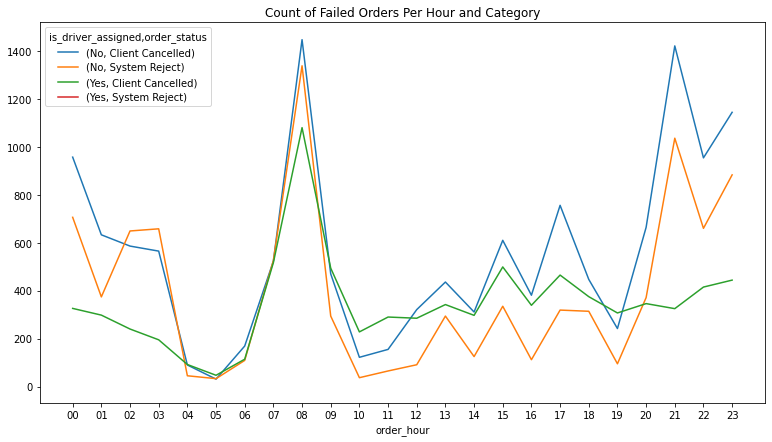

In [61]:
p = gb2.reset_index().pivot(index="order_hour",
                            columns=["is_driver_assigned", "order_status"],
                            values="order_gk").plot(xticks=range(0, 24),
                                                    figsize=(13, 7),
                                                    title="Count of Failed Orders Per Hour and Category")

Overall, the 4 rejects follow the same distribution thoughout the day with the highest number of failed orders is recorded at 8 a.m and 9 p.m. A notable point is that the count of client cancellations with the assigned driver is stably lower during the night hours when compared to the other 2 types.

<a id="Q3"></a>
### **Question 3**

**Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?**

<a id="Q4"></a>
### **Question 4**

**Plot the distribution of average ETA by hours. How can this plot be explained?**